Primal-Dual Splitting Algorithm and application to image analysis
==============================
Adapted from Laurent Condat and Gabriel Peyré notebooks
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$

This lecture explores the primal-dual proximal splitting algorithm proposed in 

**A. Chambolle and T. Pock**, "A First-order primal-dual algorithm for convex problems with application to imaging,"
_Journal of Mathematical Imaging and Vision_,
vol. 40, no. 1, 2011

and further analyzed and extended in 

**L. Condat**, "A primal-dual splitting method for convex optimization involving Lipschitzian, proximable and linear composite terms," _J. Optimization Theory and Applications_, vol. 158, no. 2, 2013.

In [1]:
from __future__ import division
import numpy as np
import scipy as scp
import pylab as pyl
import matplotlib.pyplot as plt

from numpy import *
from numpy.fft import *
from numpy.random import *
from numpy.linalg import *
from scipy.misc import *

import warnings
warnings.filterwarnings('ignore')


Convex Optimization with a Primal-Dual Scheme
---------------------------------------------

We consider a (primal) optimization problem of the form
$$ \umin{x\in X} F(Lx) + G(x) $$
where $F:Y\to\RR$ and $G:X\to\RR$ are convex functions over Hilbert spaces $X$ and $Y$, whose proximity operators can be computed, and $L:X\to Y$ is a linear operator.

For the primal-dual algorithm to be applicable, one should be able to
compute efficiently the proximal mapping of $F$ and $G$, defined as:
$$ \text{Prox}_{\gamma F}(x) = \uargmin{y} \frac{1}{2}\norm{x-y}^2 + \ga F(y) $$
(the same definition applies also for $G$).

Several problems of image analysis could be cast into this framework.


Primal-dual Algorithm (optimized Arrow-Hurwicz version)
------
Introducing the Fenchel conjugate $F^*$ of $F$, the problem could be written as 
$$ \umin{x\in X}\umax{y\in Y} <Lx,y>+G(x)-F^*(y)$$

One form of the Chambolle-Pock algorithm takes initial estimates $x^{(0)}, y^{(0)}$ two parameters $\tau_0,\sigma_0>0$ such that $\tau_0\sigma_0\le 8$ and iterates, for $k=1,2,\ldots$
$$ \left|\begin{array}{l}
y^{(k+1)} = \mathrm{prox}_{\sigma_n F^*}(  y^{(k)}+ \sigma_n L(x^{(k)}) ) \\
x^{(k+1)} = \mathrm{prox}_{\tau_n G}( x^{(k)}- \tau_n L^*(y^{k+1})) \\
\theta_k=1/\sqrt{1+2\gamma\tau_n},\;\tau_{k+1}=\theta_k\tau_k,\;\sigma_{k+1}=\sigma_k/\theta_k\\
 \end{array}\right.$$
 where usual values are $\gamma=0.035\lambda$ and $\tau_0=0.02, \sigma_0=400$. In the next python implementation, we chose $\gamma=0$ for simplicity.

We recall that being able to compute the proximity operator of $f^*$ is
equivalent to being able to compute the proximity operator of $f$, thanks to the Moreau identity
$$ x = \mathrm{prox}_{\gamma f^*}(x) + \gamma \mathrm{prox}_{f/\gamma}(x/\gamma) $$

Our test image 
-----

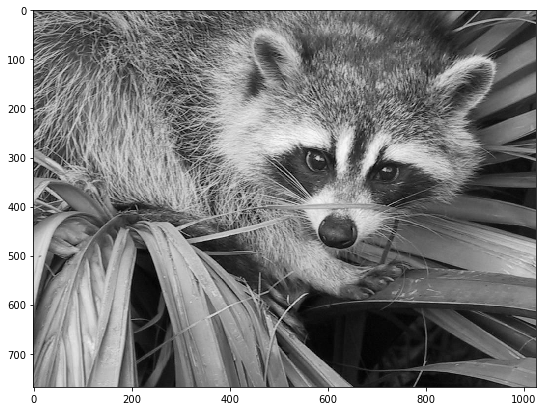

In [2]:
xsharp = face(gray=True)
#xsharp = plt.imread('lena-gray.png')
xsharp = xsharp.astype(float32)
plt.figure(figsize=(9, 9))
plt.imshow(xsharp, interpolation='nearest', cmap='gray', vmin=0, vmax=255)

Denoising
------

- **Denoising TV - ROF - L2**

*Idea:* to denoise an image $\mathbf{I}$ by minimizing the $L^1$ norm of the gradient of reconstructed image, and $L^2$ norm from the original image. The problem therefore reads
$$\umin{u}\int_\Omega|\nabla u|dx+\frac\lambda2\|u-\mathbf{I}\|_2^2$$
where $L(u)=\nabla u$ and $F$ is the $L^1$ norm, and $G$ proportionnal to the $L^2$ distance between $u$ and $\mathbf{I}$.

- **Denoising TV - ROF - L1**

Version with the $L^1$ norm on the fidelity to image term. The problem therefore reads
$$\umin{u}\int_\Omega|\nabla u|dx+\lambda\|u-\mathbf{I}\|_1$$
where $L(u)=\nabla u$, $F$ is the $L^1$ norm, , and $G$ proportionnal to the $L^1$ distance between $u$ and $\mathbf{I}$. 


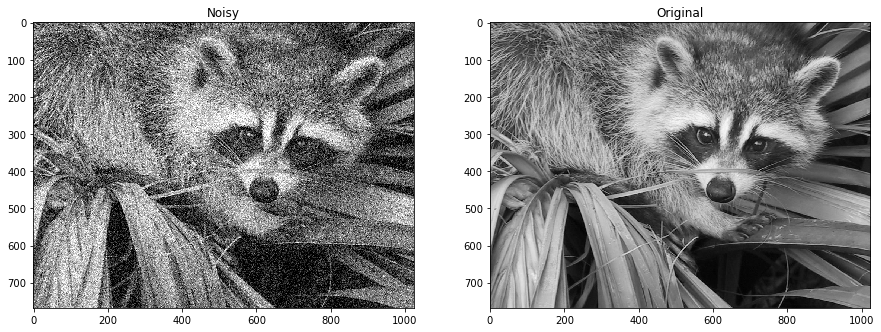

In [3]:
(N1,N2) = shape(xsharp)
noiselevel = 40
yn = xsharp + noiselevel * randn(N1,N2)
yn = (yn>=0)*yn
yn = (yn<=255)*yn+(yn>255)*255
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 15))
ax1.imshow(yn, interpolation='nearest', cmap='gray', vmin=0, vmax=255)
ax1.set_title("Noisy")
ax2.imshow(xsharp, interpolation='nearest', cmap='gray', vmin=0, vmax=255)
ax2.set_title("Original")
plt.show()

The proximity operator $\text{prox}_{\sigma F^*}$ does not depend on $\sigma$ since it is a mere projection on the $L^\infty$ unit ball, and is such that$$\big(\text{prox}_{\ga F^*}(u)\big)_{i,j}=\frac{1}{\max(\|u_{i,j}\|_2,1)}u_{i,j}\in\mathbb{R}^2,\quad\forall (i,j).$$

In [4]:
def prox_F_conj (u) :
    return u/tile(maximum(sqrt(sum(u**2,2,keepdims=True)),1),(1,1,2)) # projection on L^\infty ball

For the case of ROF - $L^2$, the prox of $\tau G$ is  given by $\operatorname{prox}_{\tau G}:x\mapsto \frac{x+\tau\lambda g}{1+\tau\lambda}$.

In [5]:
def prox_GL2 (x,y,mu) :
    return (x + mu * y)/(1. + mu) # mu will take the value tau*lambda

For the case of ROF - $L^1$, the prox of $\tau G$ is  given by $\operatorname{prox}_{\tau G}:x\mapsto \begin{cases}
x-\tau\lambda&\text{if }x-g>\tau\lambda\\
x+\tau\lambda&\text{if }x-g<-\tau\lambda\\
g&\text{otherwise}\end{cases}$.

In [6]:
def prox_GL1 (x,y,mu) :
    return (x>y+mu)*(x-mu)+(x<y-mu)*(x+mu)+((x>=y-mu)*(x<=y+mu))*y # mu will take the value tau*lambda

We define the discrete gradient operator $L=D=\nabla$ and its adjoint $L^* = D^* = -\operatorname{div}$.

In [7]:
D = lambda x : c_['2,3',r_[diff(x,1,0), zeros([1,x.shape[1]])],c_[diff(x,1,1), zeros([x.shape[0],1])]]
Dadj = lambda v : r_['0,2',-v[0,:,0],-diff(v[:-1,:,0],1,0),v[-2,:,0]] + c_['1,2',-v[:,0,1],-diff(v[:,:-1,1],1,1),v[:,-2,1]]

Primal-dual Algorithm

In [8]:
Lambda = 1.
tau = 10.
sigma = 400.
nbiter = 200
(N1,N2) = yn.shape
x = zeros([N1,N2])
y = zeros([N1,N2,2])
for iter in range(nbiter):  
    y = prox_F_conj(y + sigma*D(x))
    x = prox_GL1(x - tau*Dadj(y),yn,Lambda*tau)
xdenoised = x

Display of denoised image

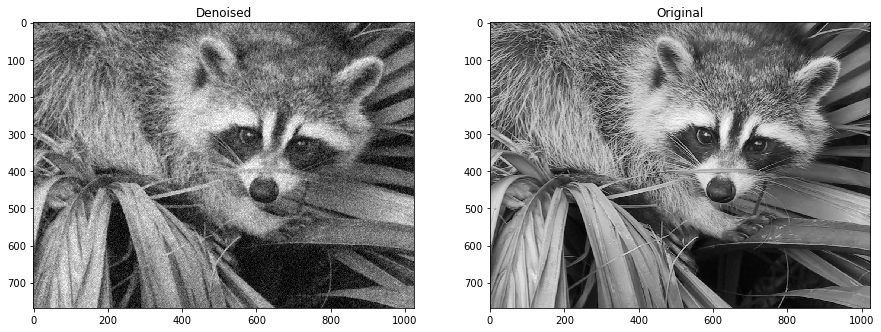

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 15))
ax1.imshow(xdenoised, interpolation='nearest', cmap='gray', vmin=0, vmax=255)
ax1.set_title("Denoised")
ax2.imshow(xsharp, interpolation='nearest', cmap='gray', vmin=0, vmax=255)
ax2.set_title("Original")
plt.show()

Image Deblurring
---------------------------------------------



More generally we can consider  a problem with a linear operator A:
$$\umin{u}\int_\Omega|\nabla u|dx+\frac\lambda2\|Au-\mathbf{I}\|_2^2$$
In case of deconvolution (or deblurring), A is a convolution operator by a kernel $k_A$, which can be numerically computed with FFT. In the case of dezooming, A is a sampling operator with regularization.


Operator $A$ is a blurring. Let us bluid it from a Gaussian kernel of width $5$, blur the image which is a product in the Fourier space, and display it.

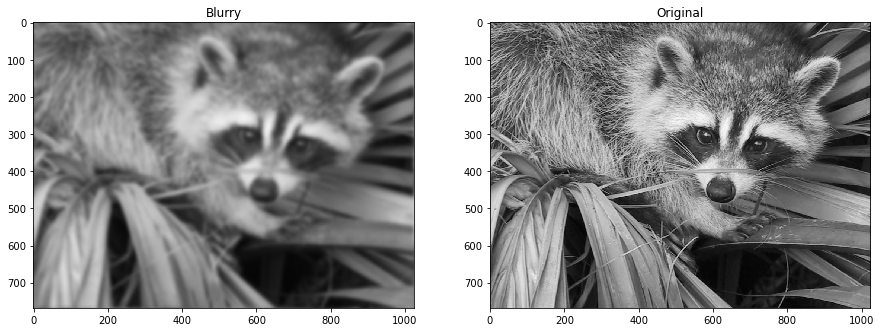

In [10]:
s = 5
xsharp = face(gray=True)
xsharp = xsharp.astype(float32)
(N1,N2) = shape(xsharp)
x = concatenate( (arange(0,N1/2), arange(-N1/2,0)) );
y = concatenate( (arange(0,N2/2), arange(-N2/2,0)) );
[Y, X] = meshgrid(y, x)
kA = exp((-X**2-Y**2)/ (2*s**2))
kA = kA/sum(kA.flatten())
kF = real(fft2(kA)) # the Fourier transform
Phi = lambda x,h: real(ifft2(fft2(x) * fft2(h))) # blurring function
yb = Phi(xsharp, kA)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 15))
ax1.imshow(yb, interpolation='nearest', cmap='gray', vmin=0, vmax=255)
ax1.set_title("Blurry")
ax2.imshow(xsharp, interpolation='nearest', cmap='gray', vmin=0, vmax=255)
ax2.set_title("Original")
plt.show()

For image deblurring, the prox of $\tau G$ is  given by 
$$\operatorname{prox}_{\tau G}:x\mapsto \Ff^{-1}\left(\frac{\Ff(x)+\tau\lambda \Ff(k_A)^*\Ff(g)}{1+\tau\lambda|\Ff(k_A)|^2}\right).$$

In [11]:
def prox_Gd (x,y,mu) :
    return real(ifft2((fft2(x)+mu*np.conj(fft2(kA))*fft2(y))/(1+mu*np.abs(fft2(kA))**2))) #mu will take the value tau*lambda

In [12]:
Lambda = 8.
tau = 10.
sigma = 400.
nbiter = 100
(N1,N2) = yb.shape
x = zeros([N1,N2])
y = zeros([N1,N2,2])
for iter in range(nbiter):  
    y = prox_F_conj(y + sigma*D(x))
    x = prox_Gd(x - tau*Dadj(y), yb,tau*Lambda)
xdeblurred = x

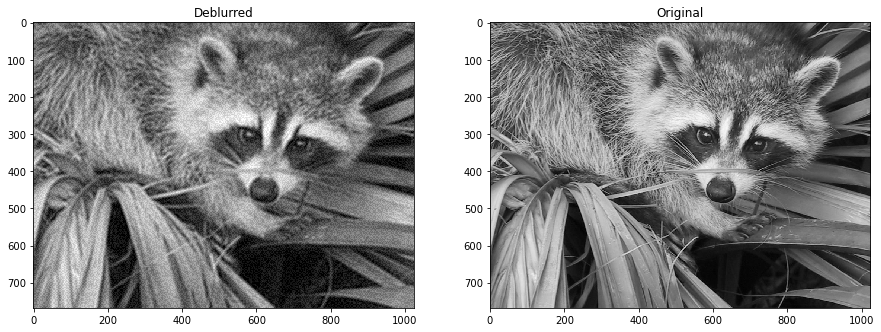

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 15))
ax1.imshow(xdeblurred, interpolation='nearest', cmap='gray', vmin=0, vmax=255)
ax1.set_title("Deblurred")
ax2.imshow(xsharp, interpolation='nearest', cmap='gray', vmin=0, vmax=255)
ax2.set_title("Original")
plt.show()

Image Inpainting
---------------------------------------------

For the image inpainting case, if we denote by $D$ the image domain and by $I\subset D$ the inpainted region, operator G could be either a fidelity term of the form
$$G(x)=\frac\lambda2\sum_{(i,j)\in D\setminus I}(x_{i,j}-g_{i,j})^2$$
or a more drastic penalization term  
$$G(x)=\begin{cases}0&\text{if }x\in H\\+\infty&\text{otherwise}\end{cases}$$
where $H=\left\{x,\;\forall(i,j)\in D\setminus I,\,x_{i,j}=g_{i,j}\right\}$. In the first case, one has
$$\operatorname{prox}_{\tau G}(x)_{i,j}=\begin{cases}x_{i,j}&\text{if }(i,j)\in I\\\frac{x_{i,j}+\tau\lambda g_{i,j}}{1+\tau\lambda}&\text{otherwise}\end{cases}$$
while in the second, if we denote by $\Phi$ the masking operator (which set to $0$ all inpainted pixels), that is, $$\Phi(x)_{i,j}=\begin{cases}0&\text{if }(i,j)\in I\\x_{i,j}&\text{otherwise}\end{cases}$$
then the proximal operator of $G$ is a projection which could be written as
$$\operatorname{prox}_{\tau G}(x)=x+\Phi(g-\Phi(x))$$

First we load the image to be inpainted and display it.

In [14]:
xsharp = face(gray=True)
xsharp = xsharp.astype(float32)
(N1,N2) = shape(xsharp)

Amount of removed pixels, and construction of damaged picture. The damaging operator put to zeros the pixel locations x for which $\Omega(x)=1$. Then we plot the observed damaged picture.

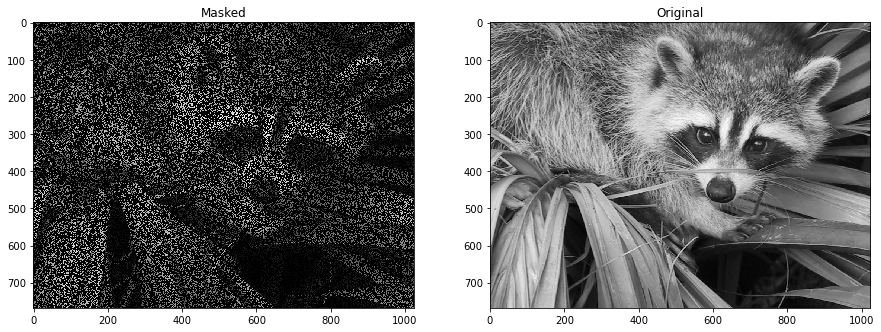

In [19]:
rho = .7

Omega = np.zeros([N1, N2])
arr=np.arange(N1*N2)
sel = np.random.permutation(arr)
np.ravel(Omega)[sel[np.arange(int(rho*N1*N2))]] = 1
Phi = lambda f, Omega: f*(1-Omega)
ym = Phi(xsharp, Omega)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 15))
ax1.imshow(ym, interpolation='nearest', cmap='gray', vmin=0, vmax=255)
ax1.set_title("Masked")
ax2.imshow(xsharp, interpolation='nearest', cmap='gray', vmin=0, vmax=255)
ax2.set_title("Original")
plt.show()

In [20]:
def prox_G1 (x,y,om,mu) :
    return x*om+((x + mu*y)/(1+mu))*(1-om) # first form
def prox_G2 (x,y,om,mu) :
    return x+Phi(y-Phi(x,om),om) # second form

In [21]:
Lambda = 16.
tau = 10.
sigma = 400.
nbiter = 100
(N1,N2) = ym.shape
x = zeros([N1,N2])
y = zeros([N1,N2,2])
for iter in range(nbiter):  
    y = prox_F_conj(y + sigma*D(x))
    x = prox_G2(x - tau*Dadj(y), ym, Omega,tau*Lambda)
xinpainted = x

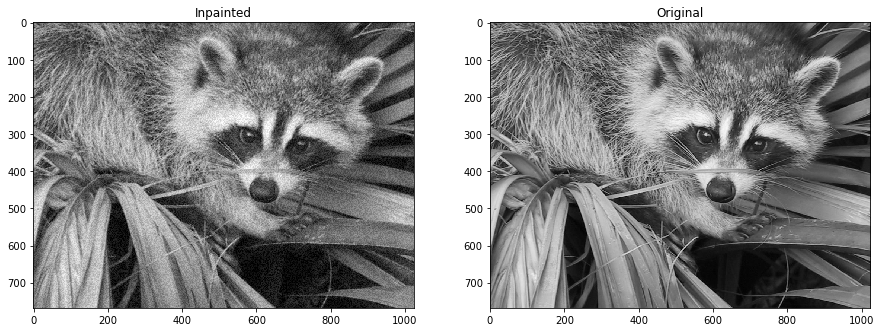

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 15))
ax1.imshow(xinpainted, interpolation='nearest', cmap='gray', vmin=0, vmax=255)
ax1.set_title("Inpainted")
ax2.imshow(xsharp, interpolation='nearest', cmap='gray', vmin=0, vmax=255)
ax2.set_title("Original")
plt.show()